In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np

In [2]:
%matplotlib inline
pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 14)
plt.style.use('fivethirtyeight')

In [3]:
data_url = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'
DF = pd.read_csv(data_url)

In [4]:
DF = DF.groupby('Country/Region').sum()
DF = DF.drop(columns = ['Lat', 'Long']).transpose()
DF['World'] = DF.sum(axis = 1)
DF = DF.rename(columns = {'United Kingdom': 'UK', 'Korea, South': 'S.Korea'})
DF.index = pd.to_datetime(DF.index, format = '%m/%d/%y')

In [5]:
Countries = ['India', 'World', #'World without China',
                      'US', 'Germany', 'Italy', 'Spain', 'China',
                      'UK', 'France',
                      'S.Korea', 'Iran', 
                       'Russia', 'Mexico', 'Canada']#[::-1]
colors = {'India': 'Blue', 'World': 'Blue', 'World without US': 'Green', 'US': 'Black', 'China': 'red', 
          'Spain': 'yellow','Italy': 'grey', 'Iran': 'brown', 'Ireland': 'violet', 'UK': 'Purple', 
          'S.Korea': 'Black', 'France': 'orange', 'Germany': 'Green', 'Australia': 'Teal',
          'Russia': 'Brown', 'Mexico': 'Orange', 'Canada': 'Teal'}

In [6]:
def plotter(DF, name, scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries
    for col in columns:
        plt.plot(DF.index,
                 DF[col],
                 label = col if col in Countries else None,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.1
                )
    plt.title(name+' wrt Date in Countries')
    plt.xlabel('Date')
    plt.ylabel(name)
    plt.legend(loc = 2)
    plt.show()

In [7]:
def plotwrtDeaths(DF2, name1, DF, name2 = 'Deaths', scale = 'log', col = 'imp'):
    plt.figure(figsize = (14, 7))
    plt.xscale(scale)
    plt.yscale(scale)
    
    columns = DF.columns if col == 'all' else Countries
    for col in columns:
        plt.plot(DF[col],
                 DF2[col],
                 label = col if col in Countries else None,
                 linestyle = '-.' if 'World' in col else '-',
                 color = colors[col] if col in colors else 'pink', 
                 alpha = 0.8 if col in Countries else 0.1
                )
    plt.title(f'{name1} wrt {name2} in Countries')
    plt.xlabel(name2)
    plt.ylabel(name1)
    plt.legend(loc = 2)
    plt.show()

In [8]:
Deaths = DF

In [9]:
Deaths[Countries].tail(14)

Country/Region,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
2020-04-22,681,186914,47412,5279,25085,21717,4636,21111,21342,238,5391,513,970,2078
2020-04-23,721,193667,49724,5575,25549,22157,4636,21840,21858,240,5481,555,1069,2241
2020-04-24,780,199999,51493,5760,25969,22524,4636,22853,22248,240,5574,615,1221,2402
2020-04-25,825,206187,53755,5877,26384,22902,4636,23697,22617,242,5650,681,1305,2571
2020-04-26,881,209900,54881,5976,26644,23190,4637,24117,22859,243,5710,747,1351,2687
2020-04-27,939,214444,56219,6126,26977,23521,4637,24458,23296,244,5806,794,1434,2841
2020-04-28,1008,220799,58355,6314,27359,23822,4637,25369,23663,246,5877,867,1569,2983
2020-04-29,1079,227665,60967,6467,27682,24275,4637,26166,24090,247,5957,972,1732,3155
2020-04-30,1154,233357,62996,6623,27967,24543,4637,26842,24379,248,6028,1073,1859,3310
2020-05-01,1223,238619,64943,6736,28236,24543,4637,27583,24597,250,6091,1169,1972,3537


c:\users\prasu\appdata\local\programs\python\python37\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


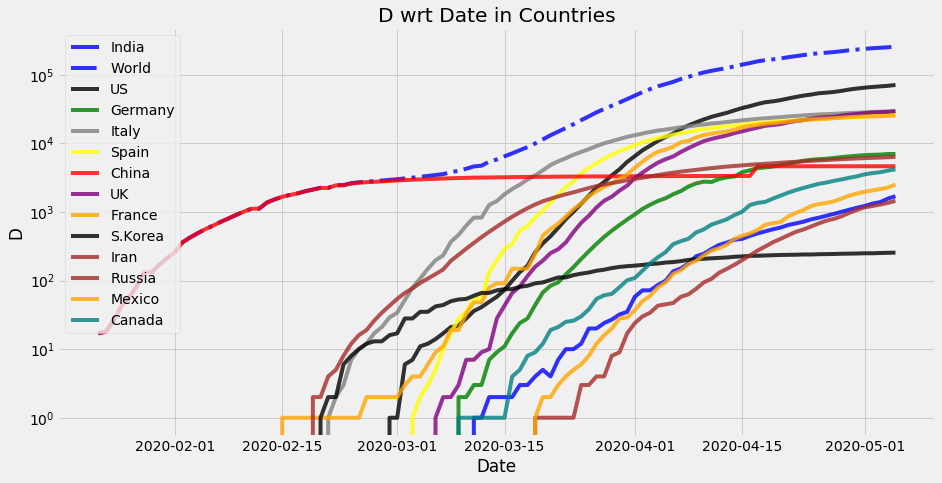

In [10]:
plotter(Deaths, 'D')

In [11]:
Biweekly_Deaths = np.round((Deaths - Deaths.shift(14))/14, 2)
Biweekly_Deaths = Biweekly_Deaths.fillna(0)#.astype('int')
Biweekly_Deaths[Countries].tail(14)

Country/Region,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
2020-04-22,35.93,6682.86,2081.57,209.29,529.71,494.64,92.79,899.43,746.79,2.71,99.86,32.14,56.86,119.36
2020-04-23,35.36,6627.50,2104.93,212.00,519.29,479.29,92.64,872.64,687.86,2.57,97.93,34.21,62.50,124.14
2020-04-24,38.14,6563.29,2082.86,213.79,508.57,460.21,92.57,862.64,645.21,2.29,95.86,37.21,70.57,131.79
2020-04-25,38.36,6574.36,2100.93,224.36,494.00,449.71,92.36,862.93,626.14,2.21,92.36,41.07,73.71,136.93
2020-04-26,39.29,6431.93,2056.79,211.00,481.79,427.21,92.43,843.93,603.36,2.07,88.29,44.07,75.36,140.93
2020-04-27,41.50,6348.79,2024.93,209.43,465.14,411.79,92.29,815.07,593.57,1.93,87.21,46.14,78.71,147.14
2020-04-28,43.93,6311.43,2006.64,215.71,449.43,411.86,92.29,805.29,566.57,1.71,85.29,49.79,83.07,148.71
2020-04-29,48.14,6214.79,2016.64,190.21,431.21,397.64,92.21,801.79,494.36,1.57,84.29,55.29,91.64,153.36
2020-04-30,50.43,6100.79,2012.07,183.64,414.07,373.43,92.21,776.29,461.21,1.36,82.79,60.07,98.07,146.50
2020-05-01,52.64,5843.93,1966.57,170.29,392.21,324.36,0.07,762.36,422.43,1.43,80.93,64.00,101.86,155.79


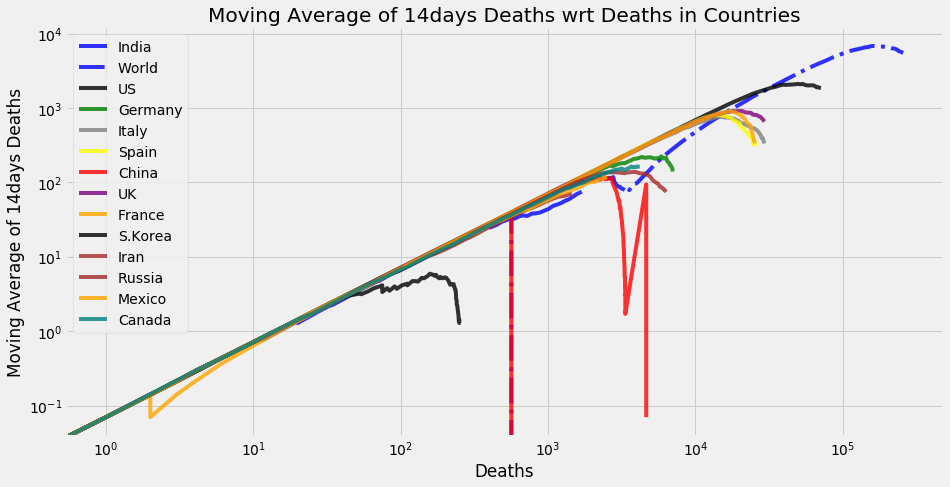

In [12]:
plotwrtDeaths(Biweekly_Deaths, 'Moving Average of 14days Deaths', Deaths)

In [13]:
Weekly_Deaths = np.round((Deaths - Deaths.shift(7))/7)
Weekly_Deaths = Weekly_Deaths.fillna(0).astype('int')
Weekly_Deaths[Countries].tail(14)

Country/Region,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
2020-04-22,39,6608,2097,211,491,430,184,881,596,2,88,45,74,153
2020-04-23,39,6532,2128,218,483,406,184,838,562,2,87,46,83,140
2020-04-24,42,6171,2012,201,461,360,0,849,509,1,88,49,96,149
2020-04-25,43,6139,2000,203,451,408,0,810,470,1,88,53,94,167
2020-04-26,46,6018,1991,199,426,391,0,799,448,1,85,55,95,160
2020-04-27,50,5907,1937,181,409,381,0,767,433,1,85,56,103,159
2020-04-28,52,5795,1896,183,387,363,0,729,409,1,83,59,102,153
2020-04-29,57,5822,1936,170,371,365,0,722,393,1,81,66,109,154
2020-04-30,62,5670,1896,150,345,341,0,715,360,1,78,74,113,153
2020-05-01,63,5517,1921,139,324,288,0,676,336,1,74,79,107,162


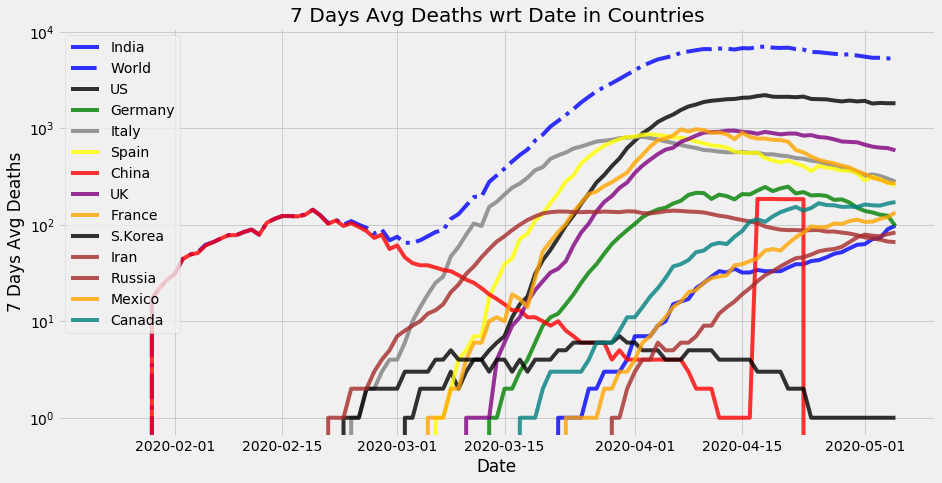

In [14]:
plotter(Weekly_Deaths, '7 Days Avg Deaths')

In [15]:
ThreeDaysDeaths = np.round((Deaths - Deaths.shift(3))/3)
ThreeDaysDeaths = ThreeDaysDeaths.fillna(0).astype('int')
ThreeDaysDeaths[Countries].tail(14)

Country/Region,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
2020-04-22,41,6380,2156,231,475,421,0,861,541,1,91,51,95,171
2020-04-23,43,6856,2355,238,478,435,0,916,530,1,91,50,119,171
2020-04-24,45,6587,2136,242,440,414,0,863,483,1,92,53,121,164
2020-04-25,48,6424,2114,199,433,395,0,862,425,1,86,56,112,164
2020-04-26,53,5411,1719,134,365,344,0,759,334,1,76,64,94,149
2020-04-27,53,4815,1575,122,336,332,0,535,349,1,77,60,71,146
2020-04-28,61,4871,1533,146,325,307,0,557,349,1,76,62,88,137
2020-04-29,66,5922,2029,164,346,362,0,683,410,1,82,75,127,156
2020-04-30,72,6304,2259,166,330,341,0,795,361,1,74,93,142,156
2020-05-01,72,5940,2196,141,292,240,0,738,311,1,71,101,134,185


In [16]:
Daily_Deaths = np.round((Deaths - Deaths.shift(1))/1)
Daily_Deaths = Daily_Deaths.fillna(0).astype('int')
Daily_Deaths[Countries].tail(14)

Country/Region,India,World,US,Germany,Italy,Spain,China,UK,France,S.Korea,Iran,Russia,Mexico,Canada
2020-04-22,36,6677,2326,246,437,435,0,847,544,1,94,57,113,168
2020-04-23,40,6753,2312,296,464,440,0,729,516,2,90,42,99,163
2020-04-24,59,6332,1769,185,420,367,0,1013,390,0,93,60,152,161
2020-04-25,45,6188,2262,117,415,378,0,844,369,2,76,66,84,169
2020-04-26,56,3713,1126,99,260,288,1,420,242,1,60,66,46,116
2020-04-27,58,4544,1338,150,333,331,0,341,437,1,96,47,83,154
2020-04-28,69,6355,2136,188,382,301,0,911,367,2,71,73,135,142
2020-04-29,71,6866,2612,153,323,453,0,797,427,1,80,105,163,172
2020-04-30,75,5692,2029,156,285,268,0,676,289,1,71,101,127,155
2020-05-01,69,5262,1947,113,269,0,0,741,218,2,63,96,113,227


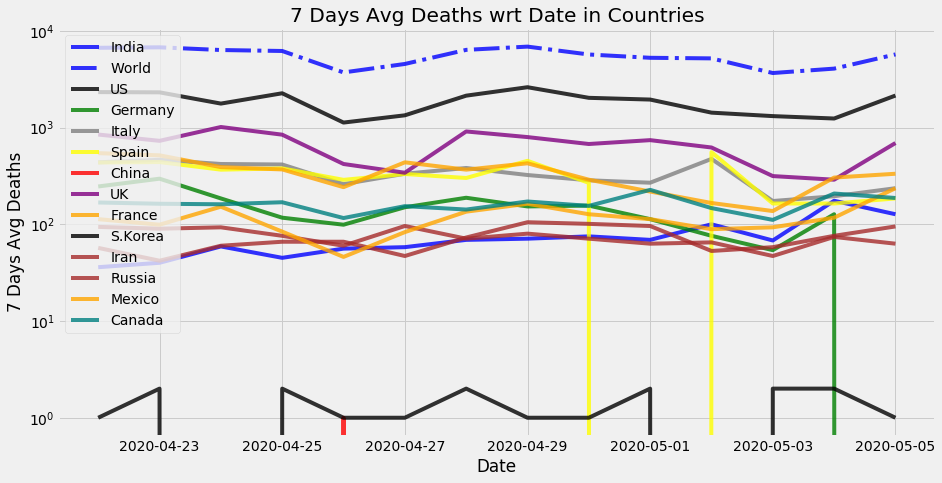

In [17]:
plotter(Daily_Deaths.tail(14), '7 Days Avg Deaths', scale = 'log')

In [18]:
Reproductivity = np.round(ThreeDaysDeaths/ThreeDaysDeaths.shift(14), 4)#.iloc[-1]
Reproductivity[Countries].iloc[-1]

Country/Region
India      3.0000
World      0.7890
US         0.8802
Germany    0.3141
Italy      0.4262
Spain      0.4140
China         NaN
UK         0.5799
France     0.5255
S.Korea    1.0000
Iran       0.6854
Russia     1.5833
Mexico     2.1594
Canada     0.9941
Name: 2020-05-05 00:00:00, dtype: float64

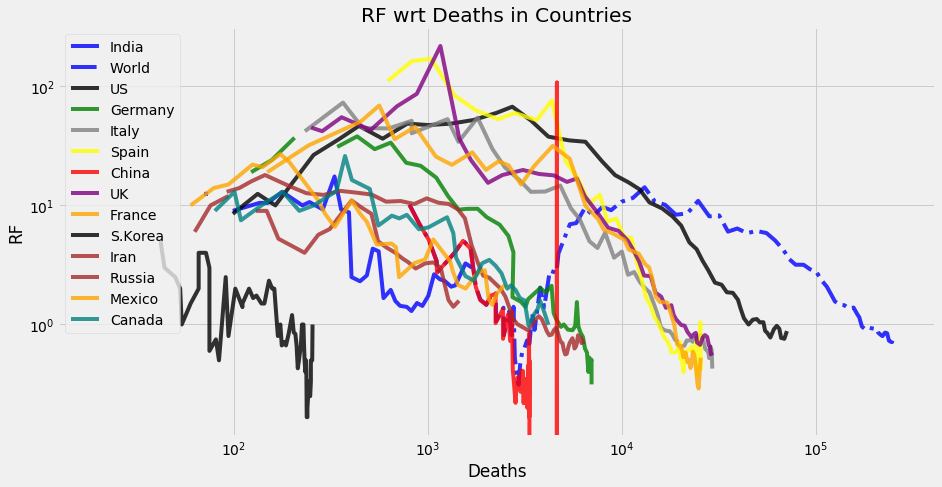

In [19]:
plotwrtDeaths(Reproductivity, 'RF', Deaths)

In [20]:
Deaths.to_csv('Deaths.csv')